## 情境
- 通常回歸模型預測值都是一個單值，沒有考慮到不確定性，在一些需要cascade 做決策可能會產生問題。
- 透過[Quantile Regressor Forest ](https://scikit-garden.github.io/examples/QuantileRegressionForests/)可以作為一個解方。
    - 簡單來說，QRF是預測y值的百分位數，而不是y值，藉由這樣的想法，也可以簡單擴充到其他模型中。
    - GDBT 也可以透過將loss設定'quantile'、alpha設定好，就可以變成此種算法

- 需要下載套件
```
    pip install scikit-garden
```
- 解決的問題
    - 增加預測的可信度。

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor

In [10]:
boston = load_boston()
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
model = GradientBoostingRegressor(random_state=0, min_samples_split=10, n_estimators=1000, max_depth=4)
model_lower_bound = GradientBoostingRegressor(random_state=0, min_samples_split=10, n_estimators=1000, max_depth=4, loss='quantile', alpha=0.05)
model_higher_bound = GradientBoostingRegressor(random_state=0, min_samples_split=10, n_estimators=1000, max_depth=4, loss='quantile', alpha=0.95)

In [15]:
model.fit(X_train, y_train)
model_lower_bound.fit(X_train, y_train)
model_higher_bound.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.95, loss='quantile', max_depth=4,
                          min_samples_split=10, n_estimators=1000,
                          random_state=0)

In [16]:
y_test_ori = model.predict(X_test)
y_test_lower = model_lower_bound.predict(X_test)
y_test_higher = model_higher_bound.predict(X_test)

In [18]:
for i in range(len(X_test)):
    print(y_test_ori[i], y_test_lower[i], y_test_higher[i])

22.387949944712293 20.432831092358825 26.248482259765574
19.9228175118107 13.798075715195345 20.443798820179698
23.578743738934133 20.610058130564624 24.684731187110277
26.106340799732077 18.69554083500646 30.43127006993626
27.765171220906446 24.645600552634562 30.01216826008527
23.577039709174286 21.95253104891674 26.48987097238909
31.819119508040487 26.11489322968088 34.96501706317123
22.974789292990636 21.995590091827033 26.7234723298939
32.84078582313241 25.382567967890054 34.242241500866754
37.99714884645524 24.52559433907566 30.938172007315636
47.392385758497895 27.015774240495745 46.32976654023223
45.714613994694496 29.024823780065873 42.53931370532537
30.0760443023218 23.218694597499905 32.34210062110053
18.266890826326804 14.06336868321302 22.438302941793232
18.506811881006424 16.901860277315322 21.71216295457941
17.751799763776173 16.97973083430375 16.419228422535998
16.40788977663408 13.850143741595376 19.864414818802107
36.849466808301514 26.764858077190603 37.3823322853084

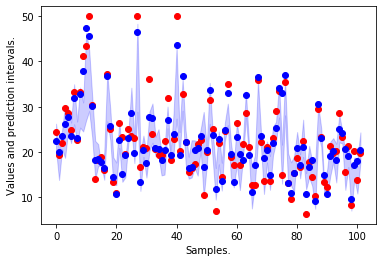

In [23]:
# 透過fill_between圖解

plt.plot(y_test, "ro") # 真實紅圓點
plt.plot(y_test_ori, "bo") # 真實紅圓點
plt.fill_between(
    np.arange(len(y_test_ori)), y_test_lower, y_test_higher, alpha=0.2, color="b",
    label="Pred. interval")
plt.xlabel("Samples.")
plt.ylabel("Values and prediction intervals.")
# plt.xlim([0, 500])
plt.show()